# About Dataset:

The data has been split into two groups:
1.training set (train.csv)
2.test set (test.csv)

Following is the information about columns of dataset
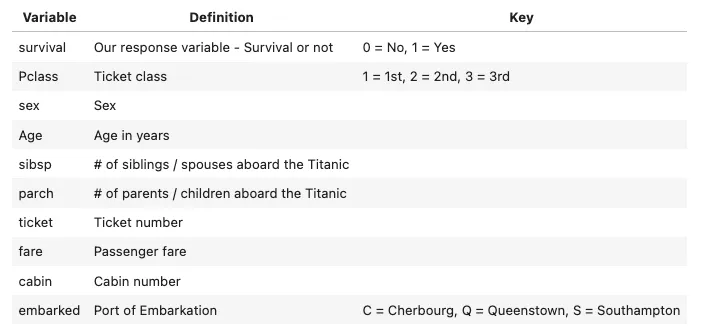

1. Added 2 extra random columns named "random_A" and "random_B".

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Titanic.csv')
df.columns = map(str.lower, df.columns)
df = df.dropna(subset=['survived'])
X = df.drop("survived", axis = 1)
y = df['survived']

#added two random var
rng = np.random.RandomState(seed=42)
X["random_A"] = rng.randint(3, size=X.shape[0])
X["random_B"] = rng.randn(X.shape[0])

2. Cleaning and Transformation of Data

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

categorical_columns = ["pclass", "sex", "embarked", "random_A"]
numerical_columns = ["age", "sibsp", "parch", "fare", "random_B"]

#did a simple imputation to fill missing categorical var with mode. The only var missing is embarked with 2 missing values
X['embarked'] = X['embarked'].fillna(X['embarked'].mode()[0])
enc = OrdinalEncoder()
X[categorical_columns] = enc.fit_transform(X[categorical_columns] )

#imputed numerical var missing values with mean
X[numerical_columns] = X[numerical_columns].apply(lambda x: x.fillna(np.mean(x)))

X = X[categorical_columns + numerical_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

3. Now we build a Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
         n_estimators=100,
         n_jobs=-1,
         min_samples_leaf = 1,
         oob_score=True,
         random_state = 42)
rf.fit(X_train, y_train)

print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.758


<Axes: >

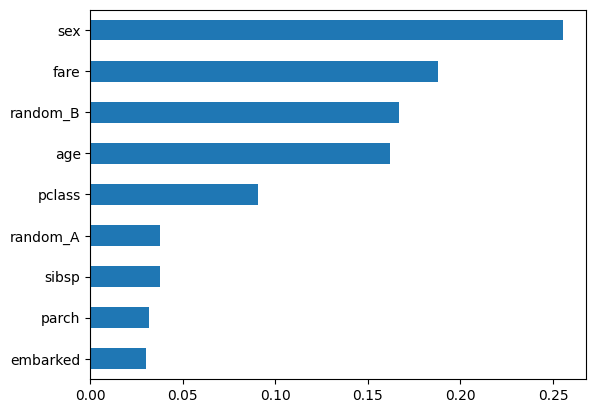

In [14]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

## NOTICE that random_B is given as Important feature

# Task
1. Use permutation_importance library and show importance again in
 bar graph.
   (Hint: from sklearn.inspection import permutation_importance)
2. Implement Drop Column Importance and Find correct importance of all features and show them with a horizontal plot
3. Improve Accuracy with Drop column method.
